In [1]:
# import tensorflow as tf
# print(tf.__version__)
!pip install tensorflow==1.15

import tensorflow as tf
print(tf.__version__)
print(tf.test.gpu_device_name())

# To Yuki and Naveen, make sure the output is
# >> 1.15.0
# >> /device:GPU:0

1.15.0
/device:GPU:0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive
!mkdir stylegans
%cd stylegans
!mkdir stylegans_dir

# Make Directories

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive
mkdir: cannot create directory ‘stylegans’: File exists
/content/drive/My Drive/stylegans
mkdir: cannot create directory ‘stylegans_dir’: File exists


In [3]:
!git clone https://github.com/NVlabs/stylegan.git
!git clone https://github.com/NVlabs/stylegan2.git
!git clone https://github.com/ns90001/stylegan-encoder.git

fatal: destination path 'stylegan' already exists and is not an empty directory.
fatal: destination path 'stylegan2' already exists and is not an empty directory.
fatal: destination path 'stylegan-encoder' already exists and is not an empty directory.


In [6]:
%cd /content/drive/My Drive/stylegans/stylegan2
 
import os
import pickle
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import dnnlib
import dnnlib.tflib as tflib
from tqdm import tqdm
import PIL.Image
import pretrained_networks


 
# Before running make sure you have downloaded https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ and placed it under stylegans dir

# Initialize TensorFlow.
tflib.init_tf()
 
# Load pre-trained network.
_G, _D, Gs = pretrained_networks.load_networks("/content/drive/MyDrive/stylegan2-car-config-d.pkl")

# Above code segmenet load the trained generator

/content/drive/My Drive/stylegans/stylegan2
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Compiling... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Compiling... Loading... Done.


In [27]:
rnd = np.random.RandomState(20)
latents = rnd.randn(1, Gs.input_shape[1])
latents2 = rnd.randn(1, Gs.input_shape[1])

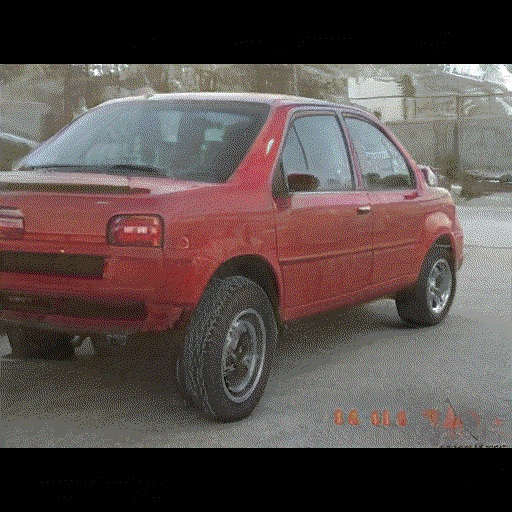

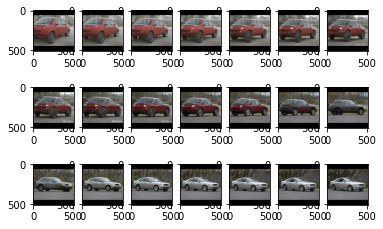

In [28]:
import imageio
from IPython.display import Image

fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
image_gif = []

for my_lambda in range(0, 101, 5):
  plt.subplot(3, 7, (my_lambda//5) + 1)
  cur_latent = (my_lambda/100)*latents + (1-(my_lambda/100))*latents2
  images = Gs.run(cur_latent, None, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)
  image_one = PIL.Image.fromarray(images[0], 'RGB')
  image_gif.append(image_one)
  plt.imshow(images[0])
  plt.tick_params(labelbottom="off",bottom="off")
  plt.tick_params(labelleft="off",left="off")

image_gif[0].save('./anime.gif', save_all=True, append_images=image_gif[1:],
                    duration=100, loop=0)  

Image('./anime.gif', format='png')

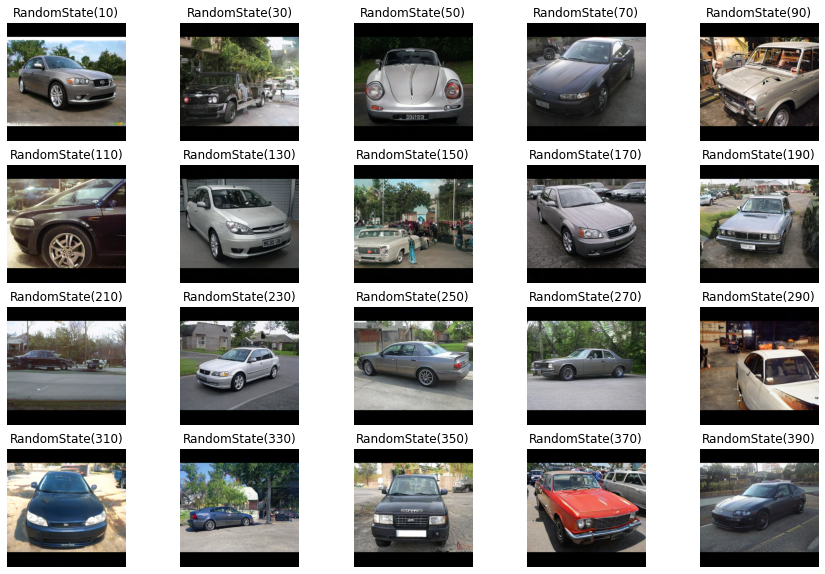

In [9]:
plt.figure(figsize=(15,10))

for i in range(20):
  rnd = np.random.RandomState(i*20+10)
  latents = rnd.randn(1, Gs.input_shape[1])
  
  plt.subplot(4,5,i+1)
  fmt = dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True)
  images = Gs.run(latents, None, truncation_psi=0.7, randomize_noise=True, output_transform=fmt)
  plt.title("RandomState(" + str(i*20+10) + ")")
  plt.imshow(images[0])
  plt.tick_params(labelbottom="off",bottom="off")
  plt.tick_params(labelleft="off",left="off")
  plt.axis('off')